## Importing Libraries

In [18]:
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

## Loading Dataset

In [2]:
data = open('sonnet.txt').read()

## Extracting sentences

In [3]:
# excluding credentials/citations
corpus = data[740:100967].split('\n')
corpus[:10]

['I',
 '',
 '  From fairest creatures we desire increase,',
 "  That thereby beauty's rose might never die,",
 '  But as the riper should by time decease,',
 '  His tender heir might bear his memory:',
 '  But thou, contracted to thine own bright eyes,',
 "  Feed'st thy light's flame with self-substantial fuel,",
 '  Making a famine where abundance lies,',
 '  Thy self thy foe, to thy sweet self too cruel:']

In [4]:
punctations = [',', '!', '?']
processed_corpus = []

for i in corpus:
    # removing extra spaces at start & end
    i = i.strip()
    
    # excluding stanza numbers
    if(len(i)>4):
        for j in punctations:
            i = i.replace(j, ' '+j)
        processed_corpus.append(i)
        
processed_corpus[:10]

['From fairest creatures we desire increase ,',
 "That thereby beauty's rose might never die ,",
 'But as the riper should by time decease ,',
 'His tender heir might bear his memory:',
 'But thou , contracted to thine own bright eyes ,',
 "Feed'st thy light's flame with self-substantial fuel ,",
 'Making a famine where abundance lies ,',
 'Thy self thy foe , to thy sweet self too cruel:',
 "Thou that art now the world's fresh ornament ,",
 'And only herald to the gaudy spring ,']

## Tokenization

In [5]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(
    num_words=None,
    filters='"#$%&()*+-./:;<=>@[\\]^_`{|}~\t\n',
    lower=True,
    split=' ',
    char_level=False,
    oov_token=None
)

tokenizer.fit_on_texts(processed_corpus)

In [6]:
total_intake = len(tokenizer.word_index) + 1
print('Total words:', total_intake)
# actual_words + punctuations + unknown_word

Total words: 3296


## Mapping to sequences

In [7]:
# example of mapping
tokenizer.texts_to_sequences([processed_corpus[0]])

[[37, 418, 875, 166, 215, 516, 1]]

In [8]:
sequences = []

for line in processed_corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    
    for i in range(1, len(token_list)):
        n_gram_seq = token_list[:(i+1)]
        sequences.append(n_gram_seq)
        
sequences[:10]

[[37, 418],
 [37, 418, 875],
 [37, 418, 875, 166],
 [37, 418, 875, 166, 215],
 [37, 418, 875, 166, 215, 516],
 [37, 418, 875, 166, 215, 516, 1],
 [9, 876],
 [9, 876, 136],
 [9, 876, 136, 353],
 [9, 876, 136, 353, 104]]

## Padding sequences

In [26]:
pad_type = 'pre'

In [9]:
max_length = max([len(x) for x in sequences])

padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_length, padding=pad_type)
padded_sequences[:10]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         37, 418],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  37,
        418, 875],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  37, 418,
        875, 166],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  37, 418, 875,
        166, 215],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  37, 418, 875, 166,
        215, 516],
       [  0,   0,   0,   0,   0,   0,   0,   0,  37, 418, 875, 166, 215,
        516,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          9, 876],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   9,
        876, 136],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   9, 876,
        136, 353],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   9, 876, 136,
        353, 104]])

## Splitting into predictors & labels

In [10]:
predictors, labels = padded_sequences[:, :-1], padded_sequences[:, -1]

In [11]:
predictors[:10]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         37],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  37,
        418],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  37, 418,
        875],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  37, 418, 875,
        166],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  37, 418, 875, 166,
        215],
       [  0,   0,   0,   0,   0,   0,   0,   0,  37, 418, 875, 166, 215,
        516],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          9],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   9,
        876],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   9, 876,
        136],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   9, 876, 136,
        353]])

In [12]:
labels[:10]

array([418, 875, 166, 215, 516,   1, 876, 136, 353, 104])

## Converting labels to categorical-values

In [13]:
categorical_labels = tf.keras.utils.to_categorical(labels, num_classes=total_intake)
categorical_labels.shape

(17468, 3296)

## Creating model

In [14]:
embedding_dim = 100

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=total_intake, output_dim=embedding_dim, input_length=(max_length-1)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=150, return_sequences=True)),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.LSTM(units=100),
    tf.keras.layers.Dense(units=(total_intake//2), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(units=(total_intake), activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 14, 100)           329600    
_________________________________________________________________
bidirectional (Bidirectional (None, 14, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 14, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1648)              166448    
_________________________________________________________________
dense_1 (Dense)              (None, 3296)              5435104   
Total params: 6,392,752
Trainable params: 6,392,752
Non-trainable params: 0
______________________________________________

## Compiling model

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

## Training model

In [17]:
history = model.fit(x=predictors, y=categorical_labels, epochs=10, shuffle=True)

Epoch 1/10
546/546 [==============================] - 58s 106ms/step - loss: 6.5416 - acc: 0.1020
Epoch 2/10
546/546 [==============================] - 57s 105ms/step - loss: 6.1289 - acc: 0.1025
Epoch 3/10
546/546 [==============================] - 58s 105ms/step - loss: 6.0057 - acc: 0.1045
Epoch 4/10
546/546 [==============================] - 57s 105ms/step - loss: 5.8918 - acc: 0.1049
Epoch 5/10
546/546 [==============================] - 58s 106ms/step - loss: 5.8005 - acc: 0.1051
Epoch 6/10
546/546 [==============================] - 56s 102ms/step - loss: 5.7159 - acc: 0.1085
Epoch 7/10
546/546 [==============================] - 59s 108ms/step - loss: 5.6240 - acc: 0.1168
Epoch 8/10
546/546 [==============================] - 58s 106ms/step - loss: 5.5311 - acc: 0.1219
Epoch 9/10
546/546 [==============================] - 60s 110ms/step - loss: 5.4346 - acc: 0.1282
Epoch 10/10
546/546 [==============================] - 58s 106ms/step - loss: 5.3476 - acc: 0.1332


+ The above model is depicting low accuracy as it is **only** trained for 10 epochs.

## Visualizing results

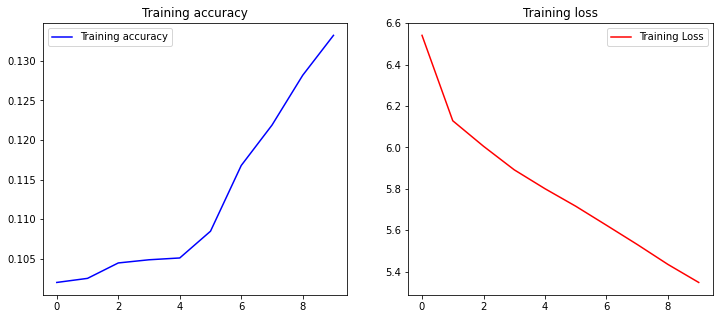

In [25]:
acc = history.history['acc']
loss = history.history['loss']
epochs = range(len(acc))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.title('Training loss')
plt.legend()

## Testing

In [38]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 15
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = tf.keras.preprocessing.sequence.pad_sequences([token_list], maxlen=(max_length-1), padding=pad_type)
    
#     predicted = model.predict_classes(token_list)
    predicted = np.argmax(model.predict(token_list), axis=-1)
    
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
            
    seed_text += ' ' + output_word
    
for i in punctations:    
    seed_text = seed_text.replace(' '+i, i)
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope, and my love, and thee,, and thee, to thee,
